# Plot bigger data

In [11]:
import sys;sys.path.append('../..')
from abslithist import *
FN_BIGGERDATA='../../data/scores/data.scores.biggerdata.pkl'

In [2]:
datadir0=os.path.join(PATH_DATA,'scores','v4')
datadir=os.path.join(PATH_DATA,'scores','v5')

def get_fns():
    fns=[]
    fns+=[os.path.join(datadir0,fn,'cache') for fn in os.listdir(datadir0)]
    fns+=[os.path.join(datadir,fn,'cache') for fn in os.listdir(datadir)]
    return fns

In [3]:
get_fns()

['/home/ryan/github/abslithist/data/scores/v4/CanonFiction/cache',
 '/home/ryan/github/abslithist/data/scores/v4/ECCO_TCP/cache',
 '/home/ryan/github/abslithist/data/scores/v4/COHA/cache',
 '/home/ryan/github/abslithist/data/scores/v4/HathiEssays/cache',
 '/home/ryan/github/abslithist/data/scores/v4/EEBO_TCP/cache',
 '/home/ryan/github/abslithist/data/scores/v4/HathiEngLit/cache',
 '/home/ryan/github/abslithist/data/scores/v5/DialNarr/cache',
 '/home/ryan/github/abslithist/data/scores/v5/EnglishDialogues/cache',
 '/home/ryan/github/abslithist/data/scores/v5/ChadwyckPoetry/cache',
 '/home/ryan/github/abslithist/data/scores/v5/ChadwyckDrama/cache',
 '/home/ryan/github/abslithist/data/scores/v5/ECCO/cache',
 '/home/ryan/github/abslithist/data/scores/v5/FanFic/cache',
 '/home/ryan/github/abslithist/data/scores/v5/CLMET/cache',
 '/home/ryan/github/abslithist/data/scores/v5/HathiEssays/cache',
 '/home/ryan/github/abslithist/data/scores/v5/HathiEngLit/cache',
 '/home/ryan/github/abslithist/da

In [4]:
badcorps={'COCA','FanFic','ChadwyckPoetry'}

In [5]:
import mpi_slingshot as sl

def load_df(cols=['id','title','year','genre','medium','corpus']):
    fns=get_fns()
    dfs=[]
    iterr=tqdm(fns)
    for fn in iterr:
        cname=fn.split('/')[-2]
        if cname in badcorps: continue
        iterr.set_description(cname)
        try:
            df=pd.DataFrame([
                {**x, **y} for x,y in sl.stream_results(fn,progress=False)
                if type(y)==dict
            ])
            dfmeta=lltk.load(cname).meta.reset_index()
        except Exception as e:
            print('!',e)
            continue
        dfmeta['corpus']=cname
        for c in cols: 
            if not c in dfmeta.columns:
                dfmeta[c]=''
#         display(dfmeta)
        try:
            dfm=dfmeta[cols].merge(df,on='id').groupby(cols).mean().reset_index()
        except KeyError:
            continue
        dfs.append(dfm)
#         break
    return pd.concat(dfs)
        

In [15]:
# df=load_df()
# lltk.save_df(df,FN_BIGGERDATA)
df=lltk.read_df(FN_BIGGERDATA)
df['year2']=pd.to_numeric(df['year'],errors='coerce')
df

,id,title,year,genre,medium,corpus,Abs-Conc.LSN-Hapt.C16,Abs-Conc.LSN-Imag.C16,Abs-Conc.MRC-Conc.C16,Abs-Conc.MRC-Imag.C16,...,Woman-Man.MultiWords.C17,Woman-Man.SingleWords.C17,Woman-Man.MultiWords.C18,Woman-Man.SingleWords.C18,Woman-Man.MultiWords.C19,Woman-Man.SingleWords.C19,Woman-Man.MultiWords.C20,Woman-Man.SingleWords.C20,Woman-Man.MultiWords.median,Woman-Man.SingleWords.median
0,Addison.Spectator,Spectator (A.),1711,Fiction,,CanonFiction,-0.161186,-0.242359,-0.315548,-0.167786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ammianus.History,Roman History,391,Fiction,,CanonFiction,-0.150115,-0.161718,-0.267994,-0.114878,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AngloSaxon.Beowulf,Beowulf,1000,Fiction,,CanonFiction,0.235469,0.204149,0.181238,0.422989,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AngloSaxon.Dream of the Rood,Dream of the Rood,900,Fiction,,CanonFiction,0.167888,0.078807,0.073625,0.364264,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Anon.1001Nights.1914,1001 Nights,900,Fiction,,CanonFiction,0.122903,0.104646,0.083169,0.242794,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,Nineteenth-Century_Fiction/ncf3401.02,"The Old Manor House. A Novel, In Four Volumes....",1793,,Fiction,Chadwyck,-0.207613,-0.321690,-0.309754,-0.179884,...,0.018925,0.134683,0.337957,0.121352,0.119057,0.183298,-0.055707,-0.117191,0.134851,0.087318
1296,Nineteenth-Century_Fiction/ncf3501.01,"Mary, A Fiction.",1788,,Fiction,Chadwyck,-0.091554,-0.296489,-0.278136,-0.113583,...,0.010781,0.068008,0.350233,0.027681,0.176725,0.104263,-0.019389,-0.230090,0.160964,0.011356
1297,Nineteenth-Century_Fiction/ncf3501.02,"The Wrongs of Woman: Or, Maria. A Fragment. In...",1798,,Fiction,Chadwyck,-0.157969,-0.337050,-0.318690,-0.176717,...,0.012255,0.090204,0.322648,0.022394,0.128461,0.123690,-0.064343,-0.243800,0.132884,0.020538
1298,Nineteenth-Century_Fiction/ncf3801.01,Confessions Of A Thug,1839,,Fiction,Chadwyck,0.043163,-0.064450,-0.040997,0.089087,...,-0.049924,0.133620,-0.023422,-0.079009,-0.088282,-0.062835,-0.216491,-0.194877,-0.069778,-0.033542


In [59]:
keywords={
        'Romance':{'romance','romances'},
        'Adventure':{'adventures','adventure'},
        'Tale':{'tale','tales'},
        'Novel':{'novel','novels','novella'},
        'Essay':{'essay','essays'},
        'History':{'history','histories'},
        'Sermon':{'sermons','sermon'},
        'Letters':{'letters','letter'},
        'Treatise':{'treatise','treatises'},
        'Discourse':{'discourse','discourses'},
        'Rogue':{'rogue'}
    }

In [61]:
list(keywords.items())

[('Romance', {'romance', 'romances'}),
 ('Adventure', {'adventure', 'adventures'}),
 ('Tale', {'tale', 'tales'}),
 ('Novel', {'novel', 'novella', 'novels'}),
 ('Essay', {'essay', 'essays'}),
 ('History', {'histories', 'history'}),
 ('Sermon', {'sermon', 'sermons'}),
 ('Letters', {'letter', 'letters'}),
 ('Treatise', {'treatise', 'treatises'}),
 ('Discourse', {'discourse', 'discourses'}),
 ('Rogue', {'rogue'})]

In [76]:
def titlegenre(title):
    twords=set(tokenize(title))
    
    keywords=[('Fiction', {'romance', 'romances'}),
 ('Fiction', {'adventure', 'adventures'}),
 ('Fiction', {'tale', 'tales'}),
 ('Fiction', {'novel', 'novella', 'novels'}),
 ('Non-Fiction', {'essay', 'essays'}),
 ('History', {'histories', 'history'}),
 ('Non-Fiction', {'sermon', 'sermons'}),
 ('Non-Fiction', {'letter', 'letters'}),
 ('Non-Fiction', {'treatise', 'treatises'}),
 ('Non-Fiction', {'discourse', 'discourses'}),
 ('Fiction', {'rogue'})]

    for g,gw in keywords:
        if twords&gw:
            return g
    return None

In [77]:
titlegenre('Sermon of Robinson Crusoe, a')

'Non-Fiction'

In [78]:
def getgenre(row):
    if row.genre and row.genre not in {'Prose','Essay','Treatise'}:
        return row.genre
    return titlegenre(row.title)

In [79]:
# tqdm.pandas()

df['genre2']=df.progress_apply(getgenre,axis=1)
df

100%|██████████| 365573/365573 [01:30<00:00, 4040.94it/s] 


,id,title,year,genre,medium,corpus,Abs-Conc.LSN-Hapt.C16,Abs-Conc.LSN-Imag.C16,Abs-Conc.MRC-Conc.C16,Abs-Conc.MRC-Imag.C16,...,Woman-Man.MultiWords.C18,Woman-Man.SingleWords.C18,Woman-Man.MultiWords.C19,Woman-Man.SingleWords.C19,Woman-Man.MultiWords.C20,Woman-Man.SingleWords.C20,Woman-Man.MultiWords.median,Woman-Man.SingleWords.median,genre2,year2
0,Addison.Spectator,Spectator (A.),1711,Fiction,,CanonFiction,-0.161186,-0.242359,-0.315548,-0.167786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fiction,1711.0
1,Ammianus.History,Roman History,391,Fiction,,CanonFiction,-0.150115,-0.161718,-0.267994,-0.114878,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fiction,391.0
2,AngloSaxon.Beowulf,Beowulf,1000,Fiction,,CanonFiction,0.235469,0.204149,0.181238,0.422989,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fiction,1000.0
3,AngloSaxon.Dream of the Rood,Dream of the Rood,900,Fiction,,CanonFiction,0.167888,0.078807,0.073625,0.364264,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fiction,900.0
4,Anon.1001Nights.1914,1001 Nights,900,Fiction,,CanonFiction,0.122903,0.104646,0.083169,0.242794,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fiction,900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,Nineteenth-Century_Fiction/ncf3401.02,"The Old Manor House. A Novel, In Four Volumes....",1793,,Fiction,Chadwyck,-0.207613,-0.321690,-0.309754,-0.179884,...,0.337957,0.121352,0.119057,0.183298,-0.055707,-0.117191,0.134851,0.087318,Fiction,1793.0
1296,Nineteenth-Century_Fiction/ncf3501.01,"Mary, A Fiction.",1788,,Fiction,Chadwyck,-0.091554,-0.296489,-0.278136,-0.113583,...,0.350233,0.027681,0.176725,0.104263,-0.019389,-0.230090,0.160964,0.011356,None,1788.0
1297,Nineteenth-Century_Fiction/ncf3501.02,"The Wrongs of Woman: Or, Maria. A Fragment. In...",1798,,Fiction,Chadwyck,-0.157969,-0.337050,-0.318690,-0.176717,...,0.322648,0.022394,0.128461,0.123690,-0.064343,-0.243800,0.132884,0.020538,None,1798.0
1298,Nineteenth-Century_Fiction/ncf3801.01,Confessions Of A Thug,1839,,Fiction,Chadwyck,0.043163,-0.064450,-0.040997,0.089087,...,-0.023422,-0.079009,-0.088282,-0.062835,-0.216491,-0.194877,-0.069778,-0.033542,None,1839.0


In [68]:
df

,id,title,year,genre,medium,corpus,Abs-Conc.LSN-Hapt.C16,Abs-Conc.LSN-Imag.C16,Abs-Conc.MRC-Conc.C16,Abs-Conc.MRC-Imag.C16,...,Woman-Man.MultiWords.C18,Woman-Man.SingleWords.C18,Woman-Man.MultiWords.C19,Woman-Man.SingleWords.C19,Woman-Man.MultiWords.C20,Woman-Man.SingleWords.C20,Woman-Man.MultiWords.median,Woman-Man.SingleWords.median,genre2,year2
0,Addison.Spectator,Spectator (A.),1711,Fiction,,CanonFiction,-0.161186,-0.242359,-0.315548,-0.167786,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fiction,1711.0
1,Ammianus.History,Roman History,391,Fiction,,CanonFiction,-0.150115,-0.161718,-0.267994,-0.114878,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fiction,391.0
2,AngloSaxon.Beowulf,Beowulf,1000,Fiction,,CanonFiction,0.235469,0.204149,0.181238,0.422989,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fiction,1000.0
3,AngloSaxon.Dream of the Rood,Dream of the Rood,900,Fiction,,CanonFiction,0.167888,0.078807,0.073625,0.364264,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fiction,900.0
4,Anon.1001Nights.1914,1001 Nights,900,Fiction,,CanonFiction,0.122903,0.104646,0.083169,0.242794,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fiction,900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,Nineteenth-Century_Fiction/ncf3401.02,"The Old Manor House. A Novel, In Four Volumes....",1793,,Fiction,Chadwyck,-0.207613,-0.321690,-0.309754,-0.179884,...,0.337957,0.121352,0.119057,0.183298,-0.055707,-0.117191,0.134851,0.087318,Fiction,1793.0
1296,Nineteenth-Century_Fiction/ncf3501.01,"Mary, A Fiction.",1788,,Fiction,Chadwyck,-0.091554,-0.296489,-0.278136,-0.113583,...,0.350233,0.027681,0.176725,0.104263,-0.019389,-0.230090,0.160964,0.011356,None,1788.0
1297,Nineteenth-Century_Fiction/ncf3501.02,"The Wrongs of Woman: Or, Maria. A Fragment. In...",1798,,Fiction,Chadwyck,-0.157969,-0.337050,-0.318690,-0.176717,...,0.322648,0.022394,0.128461,0.123690,-0.064343,-0.243800,0.132884,0.020538,None,1798.0
1298,Nineteenth-Century_Fiction/ncf3801.01,Confessions Of A Thug,1839,,Fiction,Chadwyck,0.043163,-0.064450,-0.040997,0.089087,...,-0.023422,-0.079009,-0.088282,-0.062835,-0.216491,-0.194877,-0.069778,-0.033542,None,1839.0


In [69]:
df['corpus'].value_counts()

ECCO             154916
COHA             116599
EEBO_TCP          56351
HathiEssays       14148
Chicago            9089
ChadwyckDrama      5663
ECCO_TCP           3101
DialNarr           1918
CanonFiction       1808
Chadwyck           1300
HathiEngLit         387
CLMET               293
Name: corpus, dtype: int64

In [70]:
df['genre2'].value_counts()

Magazine                  61292
News                      41677
Fiction                   21973
Essay                     14148
Non-Fiction*              12931
Verse                      8980
Drama                      8401
Non-Fiction                2635
History                    1057
Fictional Dialogue          868
Fictional Narration         868
Film                        290
Fictional Txtnarration       91
Fictional Txtdialogue        91
Treatise                     49
Other                        31
Biography                    23
Poetry                       12
Letter                        1
Name: genre2, dtype: int64

In [71]:
okgenres={'Letters','Sermon','Essay','Treatise','Discourse','Romance','Novel','Fiction'}

In [72]:
figdf=df[df.genre2.isin(okgenres)].query('1580<=year2<=2020').groupby(['year2','genre2','corpus']).mean().reset_index()
figdf

,year2,genre2,corpus,Abs-Conc.LSN-Hapt.C16,Abs-Conc.LSN-Imag.C16,Abs-Conc.MRC-Conc.C16,Abs-Conc.MRC-Imag.C16,Abs-Conc.MT-Conc.C16,Abs-Conc.Median.C16,Abs-Conc.PAV-Conc.C16,...,Woman-Man.MultiWords.C17,Woman-Man.SingleWords.C17,Woman-Man.MultiWords.C18,Woman-Man.SingleWords.C18,Woman-Man.MultiWords.C19,Woman-Man.SingleWords.C19,Woman-Man.MultiWords.C20,Woman-Man.SingleWords.C20,Woman-Man.MultiWords.median,Woman-Man.SingleWords.median
0,1580.0,Fiction,EEBO_TCP,-0.251909,-0.340451,-0.289269,-0.085487,-0.398232,-0.327795,-0.285998,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1582.0,Fiction,CanonFiction,0.261070,0.262223,0.321769,0.414270,0.172390,0.247506,0.338227,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1584.0,Fiction,EEBO_TCP,-0.316899,-0.389045,-0.393143,-0.213023,-0.505873,-0.411806,-0.392920,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1585.0,Fiction,EEBO_TCP,-0.037367,-0.055474,-0.093899,0.015054,-0.201300,-0.115169,-0.076543,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1588.0,Fiction,EEBO_TCP,-0.229241,-0.207397,-0.224834,-0.040988,-0.363123,-0.268894,-0.236386,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,2010.0,Fiction,CanonFiction,0.186062,0.102428,0.108510,0.258561,-0.038362,0.079020,0.126339,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1052,2011.0,Fiction,CanonFiction,0.230614,0.122596,0.144963,0.291891,-0.015986,0.109607,0.164156,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1053,2014.0,Fiction,CanonFiction,0.185513,0.120819,0.097701,0.236815,-0.066809,0.063862,0.110664,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1054,2018.0,Fiction,CanonFiction,0.445080,0.319585,0.353650,0.519270,0.166160,0.312809,0.366859,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
figdf.genre2.value_counts()

Fiction     981
Treatise     42
Essay        33
Name: genre2, dtype: int64

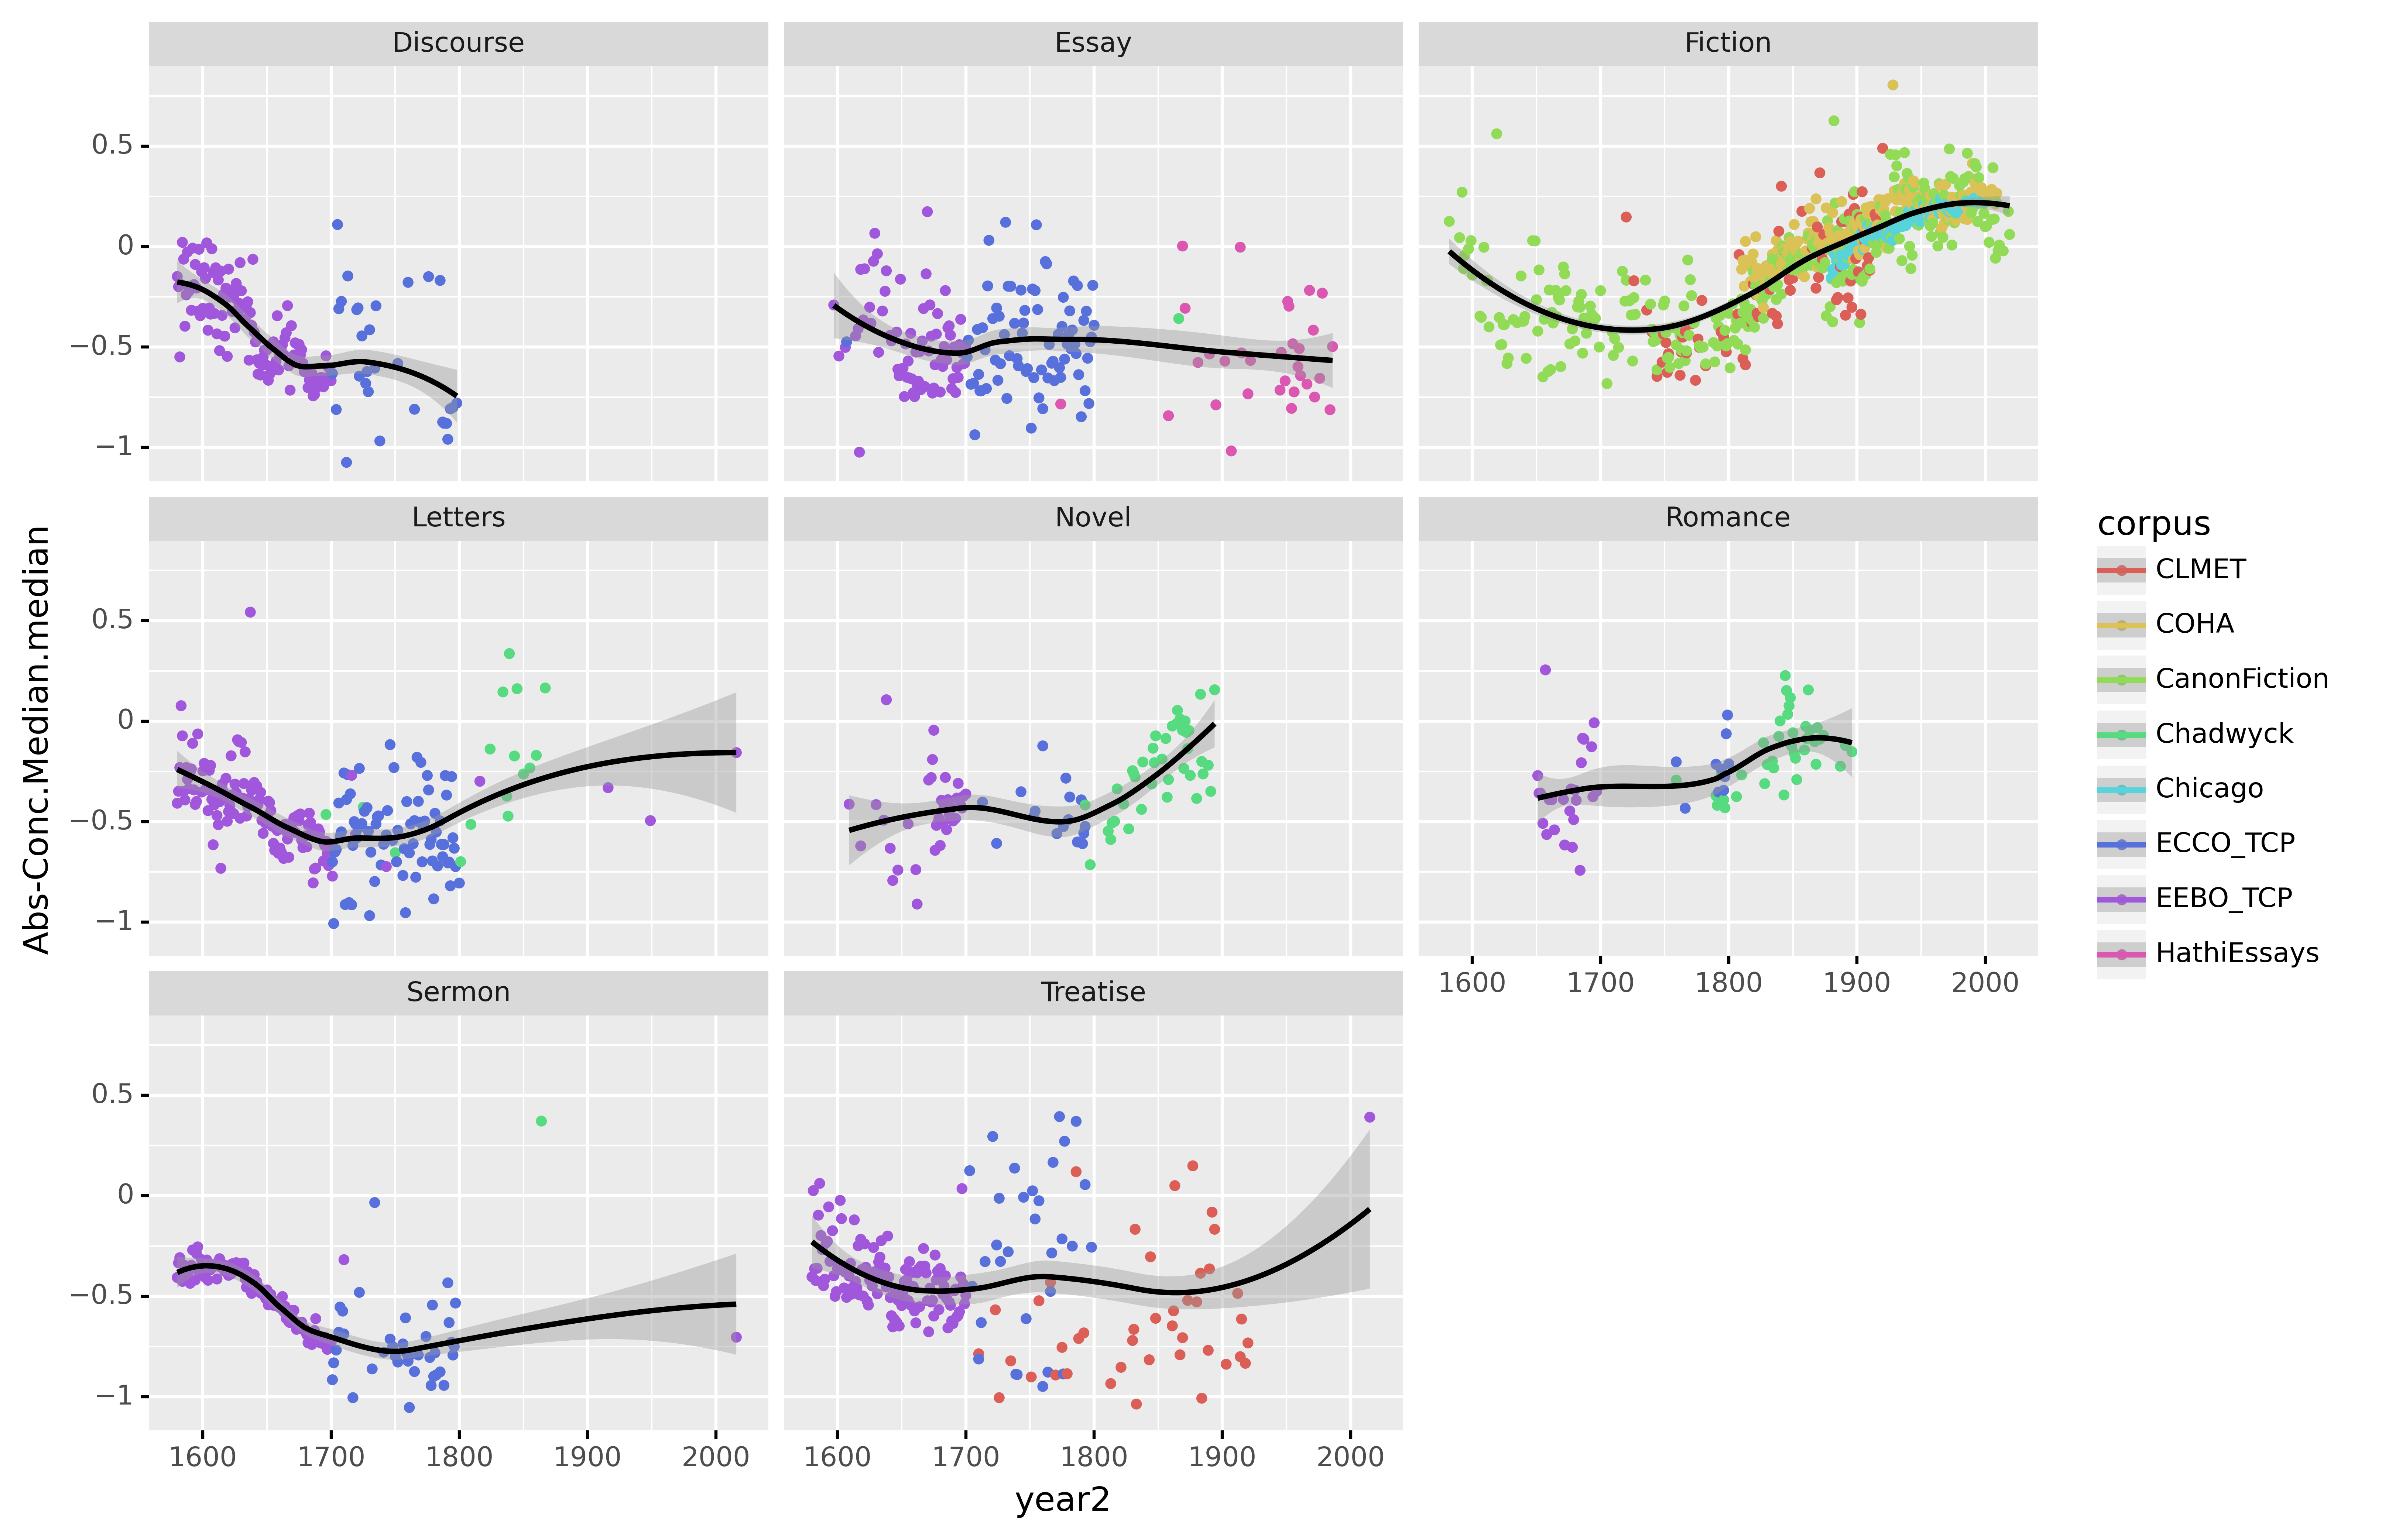

<ggplot: (8766428604569)>

In [57]:
p9.options.dpi=600
p9.options.figure_size=11,8
fig=p9.ggplot(p9.aes(x='year2',y='Abs-Conc.Median.median',color='corpus'), data=figdf)
fig+=p9.geom_point(size=1)
fig+=p9.facet_wrap('genre2')
fig+=p9.geom_smooth(p9.aes(group='genre2'),method='loess')
fig

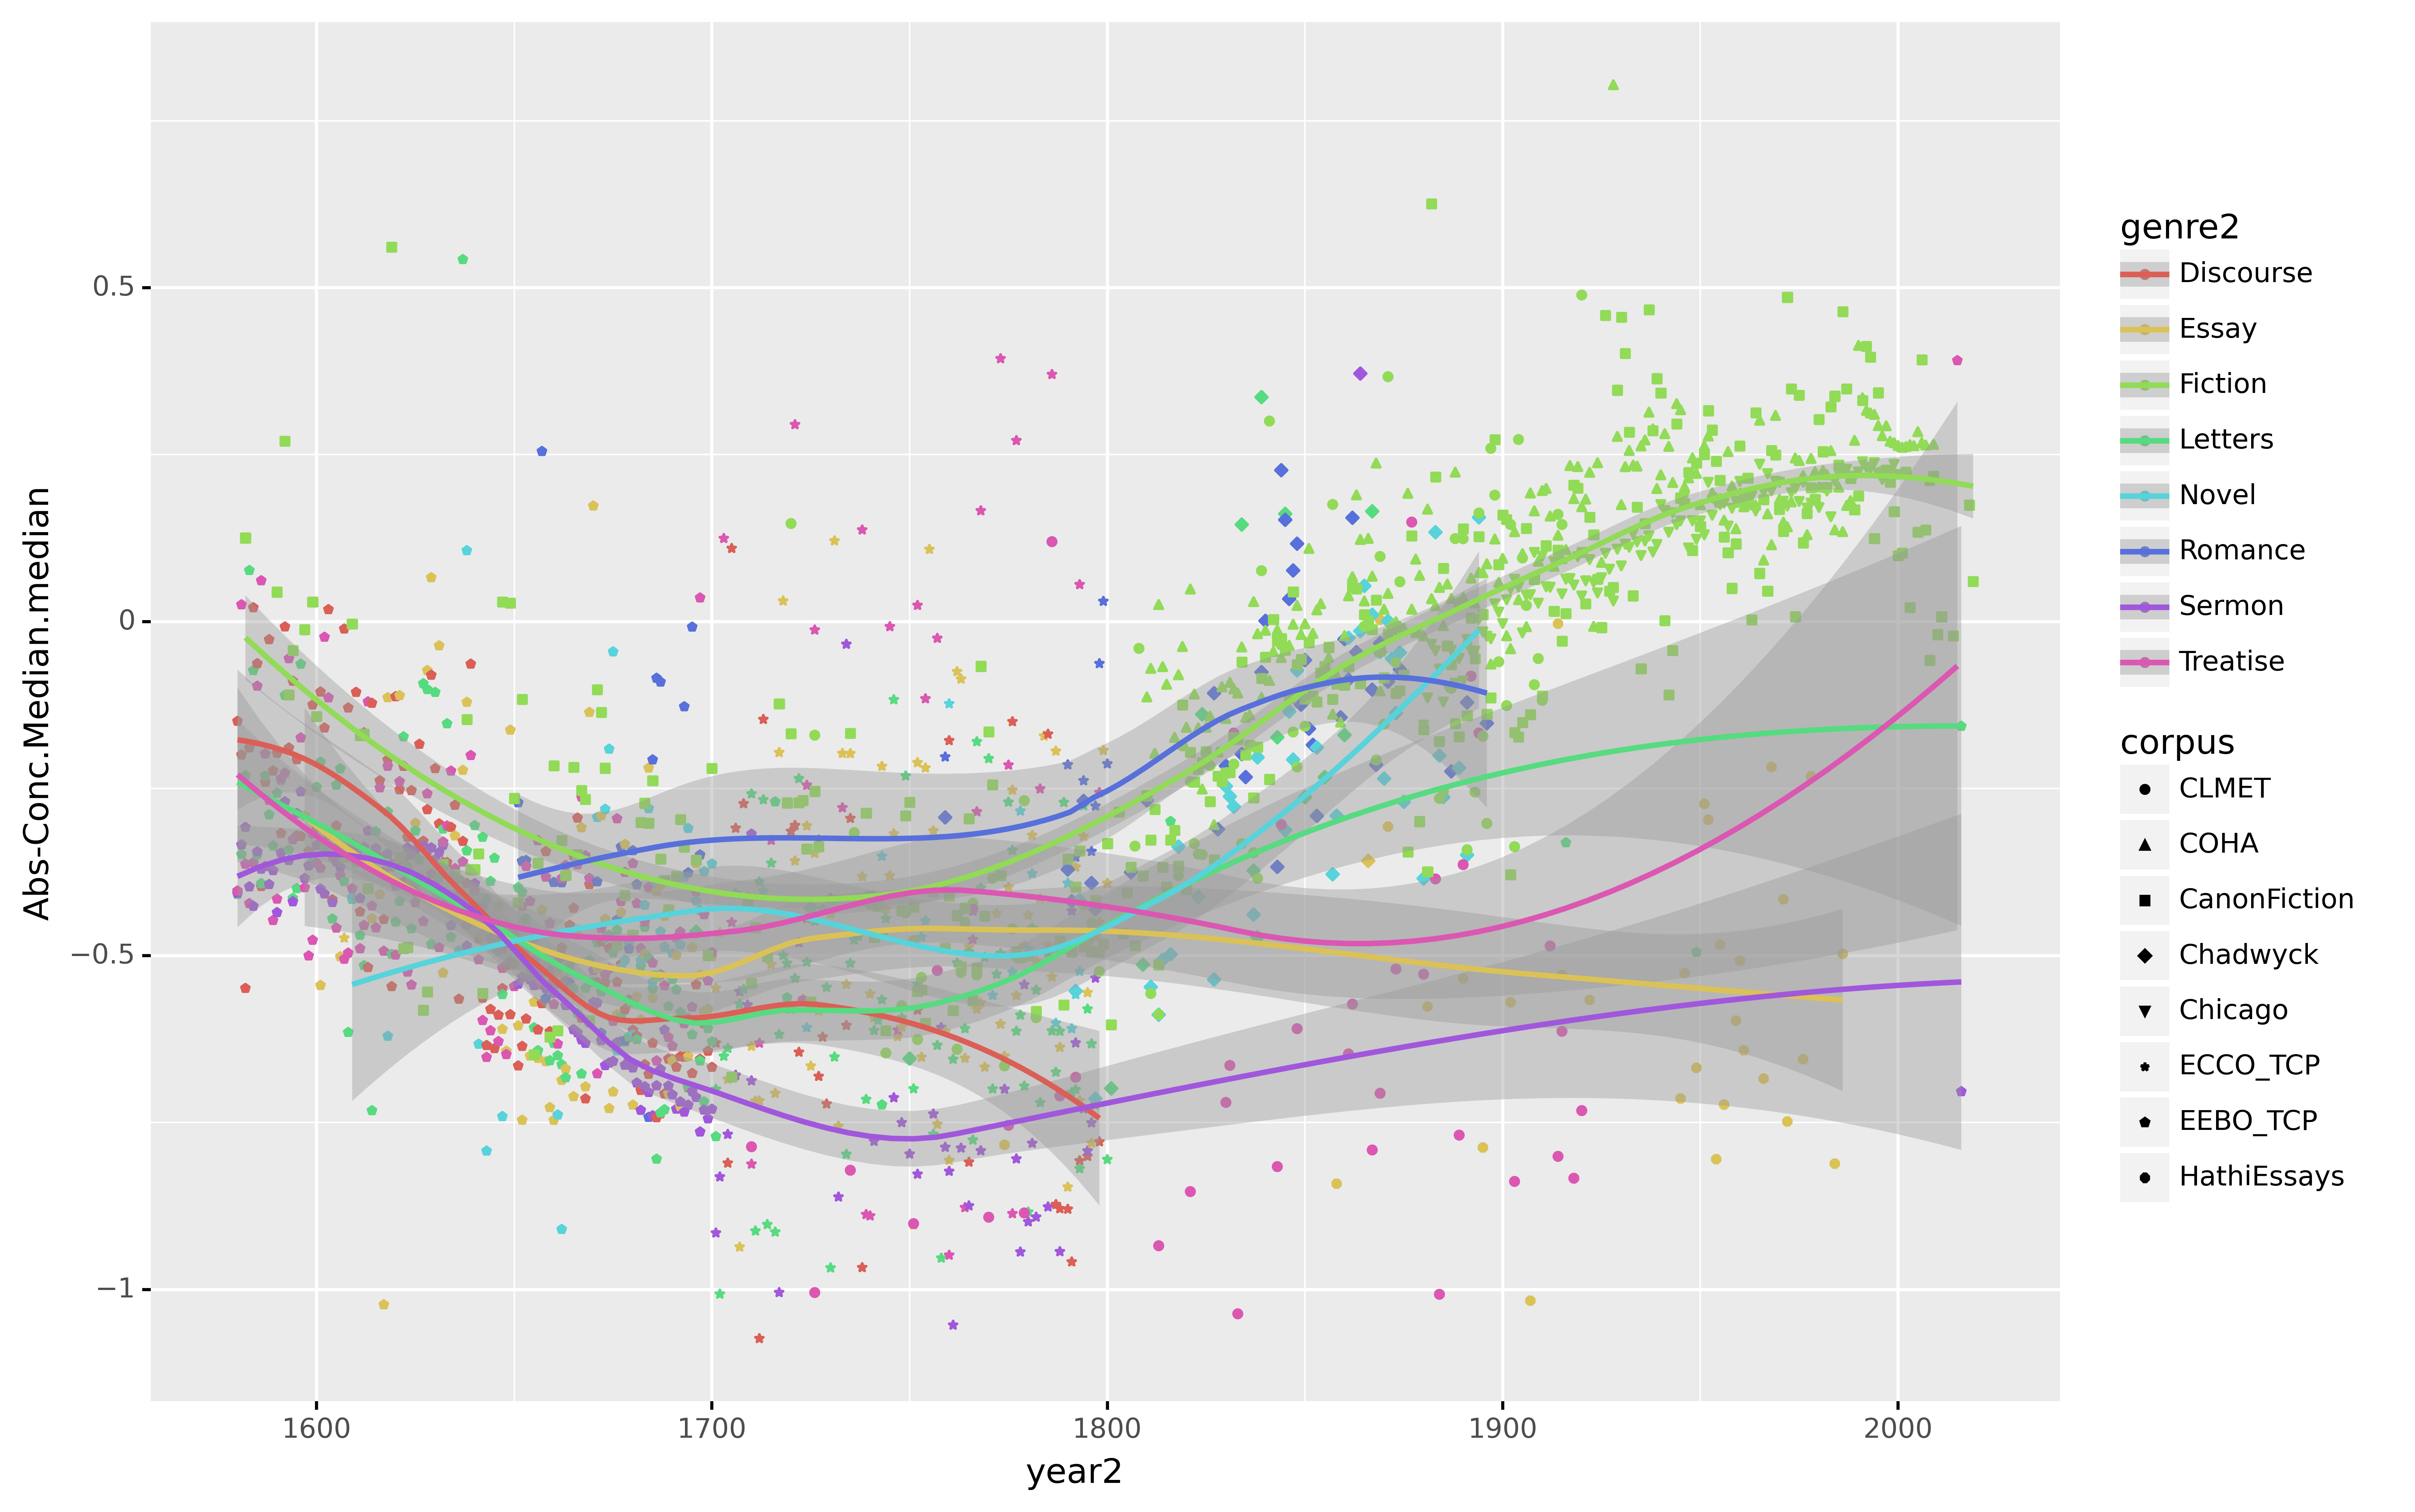

<ggplot: (8766415321733)>

In [58]:
fig=p9.ggplot(p9.aes(x='year2',y='Abs-Conc.Median.median',color='genre2',shape='corpus'), data=figdf)
fig+=p9.geom_point(size=1)
# fig+=p9.facet_wrap('genre2')
fig+=p9.geom_smooth(p9.aes(group='genre2'),method='loess')
fig